## Tabla de Contenido

- [1.Contexto](#Sección-1-Contexto)
  - [1.2 Descripción de los Campos](#Sección-1-Descripción)
- [2. Análisis Exploratorio](#Sección-2-análisis-Exploratorio)
  - [2.1 Estructura](#Sección-2-Estructura)
  - [2.2 Variables Categóricas](#Sección-2-Variables-Categóricas)
  - [2.3 Variables Enteras](#Sección-2-Variables-Enteras)
  - [2.4 Variables Continuas](#Sección-2-Variables-Continuas)
- [Sección 3: Resultados](#sección-3-resultados)

# 1: Contexto

# Análisis del comportamiento crediticio

En los últimos años, Colombia ha experimentado avances significativos en su sistema bancario y en las políticas de inclusión financiera. La adhesión de nuevos clientes a los servicios bancarios es un indicador clave de la efectividad de estas políticas y su impacto en la población colombiana. El período entre julio 2022 y junio de 2023 ha sido testigo de diversos cambios económicos y sociales que podrían haber influido en la adhesión de nuevos clientes al sistema bancario

La información detallada en este conjunto de datos tiene por objeto obtener información periódica y actualizada sobre aspectos relativos a la colocación de nuevos créditos. Con el fin de promover el fortalecimiento de la transparencia, eficiencia, participación ciudadana y fortalecimiento de las politícas públicas, la regulación y la supervisión financiera

## Pregunta SMART:

#### ¿Cómo varía el número de créditos desembolsados y los montos desembolsados en relación con el tamaño de la empresa y el tipo de crédito en el sector financiero entre Julio 2022  y junio de 2023?

#### ¿Cómo varía la tasa de interes promedio ponderada en relación con el tipo de crédito en el sector financiero para el periodo considerado?

#### ¿Como es el comportamiento de la tasa de interes promedio ponderada (Unicap) de los nuevos desembolsos en el sistema financiero por entidad financiera en Colombia  para el periodo considerado

#### ¿Cual es la tendencia historica de la tasa de interes promedio ponderada (Unicap) de los nuevos desembolsos en el sistema financiero colombiano entre  para el periodo considerado3?

### Hipótesis:

Hipótesis : Las variables de análisis están relacionadas con la colocación de nuevos créditos en el sistema bancario en Colombia durante el período entre Julio 2022 y junio de 2023.

#### Objetivo : Explorar el comportamiento de las variables de análisis en la tasa de interes promedio ponderada.

#### link: https://www.datos.gov.co/Econom-a-y-Finanzas/Tasas-de-inter-s-activas-por-tipo-de-cr-dito/u8ud-84pb

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd   ## Libreria para manipular y analizar datos
import seaborn as sns   ## Libreria para visualizar
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import norm ## distribución normal
from scipy.stats import poisson ## distribución Poisson
from scipy.stats import t ## distribución t
from scipy.stats import ttest_1samp  ## Prueba t
import statsmodels.stats as sm  ## estadísticas
import statsmodels.api as sm1  ## estadísticas
from scipy.stats import skew, kurtosis
from statsmodels.graphics.gofplots import qqplot 

In [2]:
df=pd.read_csv("Tasas de Interes Activas.csv")
# Crear la lista de nombres para el encabezado
headers = ["Tipo_Entidad","Nombre_Tipo_Entidad","Codigo_Entidad","Nombre_Entidad","Fecha_Corte","Unicap",
           "Descrip_Unicap","Renglon","Tipo_de_Persona","Sexo","Tamaño_de_Empresa","Tipo_de_Credito",
           "Tipo_de_Garantia","Producto_de_Credito","Plazo_de_Credito","TProm_Pond","Tasa_UVR","Montos_Desembolsados",
           "Numero_de_Creditos_Desembolsados"]

# 1.2 Descripción de los campos

* Tipo_Entidad: Tipo de la entidad que otorgó crédito, ejemplo; 1-Establecimiento bancario
* Nombre_Tipo_Entidad: Categoría que definie la entidad
* Código_Entidad: Número que identifica la entidad en el sistema financiero colombiano
* Nombre_Entidad: Razón social de la entidad
* Fecha_Corte: Dia/Mes/Año del reporte de la información
* Unicap: Unidad de Capitalización, en este caso Tasa de interes
* Descrip_Unicap: Descripción de la unidad de capitalización
* Renglon: Consecutivo de los registros transmitidos por la entidad
* Tipo_de_Persona: Natural,Juridica
* Sexo: Masculino/Femenino
* Tamaño_de_Empresa: Clasificación de la empresa de acuerdo a nivel de activos
* Tipo_de_Crédito: Comercial, Consumo y Vivienda
* Tipo_de_Garantía: Descripción de la garantía del crédito
* Producto_de_Crédito: Tipo de Producto crediticio
* Plazo_de_Credito: Número de meses pactados para el crédito
* TProm_Pond: Tasa Promedio Ponderada
* Tasa_UVR: Tasa UVR para créditos de vivienda
* Montos_Desembolsados: Total montos desembolsados
* Numero_de_Creditos_Desembolsados: Total de obligaciones desembolsados


# 2 Análisis Exploratorio

In [3]:
df.columns = headers
df.head(5)

,Tipo_Entidad,Nombre_Tipo_Entidad,Codigo_Entidad,Nombre_Entidad,Fecha_Corte,Unicap,Descrip_Unicap,Renglon,Tipo_de_Persona,Sexo,Tamaño_de_Empresa,Tipo_de_Credito,Tipo_de_Garantia,Producto_de_Credito,Plazo_de_Credito,TProm_Pond,Tasa_UVR,Montos_Desembolsados,Numero_de_Creditos_Desembolsados
0,1,BC-ESTABLECIMIENTO BANCARIO,58,Coopcentral,30/09/2022,1,TASAS DE INTERESES ACTIVAS,33,Natural,Masculino,No aplica,Consumo,Sin Garantia,Tarjeta de crédito para ingresos superiores a ...,Avances en efectivo,23.36,NaN,1.542100e+08,275.0
1,1,BC-ESTABLECIMIENTO BANCARIO,6,Itau,03/03/2023,1,TASAS DE INTERESES ACTIVAS,52,Natural,Masculino,No aplica,Consumo,Sin Garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos a más de 36 meses,23.93,NaN,5.368069e+08,45.0
2,1,BC-ESTABLECIMIENTO BANCARIO,54,Bancoomeva,08/07/2022,1,TASAS DE INTERESES ACTIVAS,22,Natural,Femenino,No aplica,Consumo,Sin Garantia,Libre inversión,Más de 1 año y hasta 3 años,20.13,NaN,1.620960e+07,2.0
3,1,BC-ESTABLECIMIENTO BANCARIO,13,BBVA Colombia,09/09/2022,1,TASAS DE INTERESES ACTIVAS,40,Juridica,No aplica,Mediana empresa,Comercial ordinario,Garantía idónea o no idónea,Empresarial,Hasta 30 días,13.43,NaN,1.400000e+09,1.0
4,1,BC-ESTABLECIMIENTO BANCARIO,7,Bancolombia,04/11/2022,1,TASAS DE INTERESES ACTIVAS,190,Juridica,No aplica,Gran empresa,Comercial ordinario,Garantía idónea o no idónea,Empresarial,Más de 30 días y hasta 1 año,17.79,NaN,1.781323e+10,135.0


In [4]:
df.shape

(236249, 19)

# 2.1 Estructura
El Dataset original cuenta con 236,249 registros y 19 variables de análisis. Se realiza eliminación de los "na" encontrados en 'Nombre_de_Entidad' dado que estos registros no poseen información, y se realiza conversión del tipo de variable de acuerdo con su naturaleza.

In [5]:
df.drop('Tasa_UVR', axis=1, inplace=True)

Se decide eliminar la Tasa UVR dado que esta sólo aplica para los créditos hipotecarios, y para el ejercicio se pretende analizar el comportamiento crediticio global. 

In [6]:
df.isnull().sum()

Tipo_Entidad                           0
Nombre_Tipo_Entidad                    0
Codigo_Entidad                         0
Nombre_Entidad                      3513
Fecha_Corte                            0
Unicap                                 0
Descrip_Unicap                         0
Renglon                                0
Tipo_de_Persona                        2
Sexo                                   2
Tamaño_de_Empresa                      2
Tipo_de_Credito                        2
Tipo_de_Garantia                       2
Producto_de_Credito                  114
Plazo_de_Credito                       2
TProm_Pond                             2
Montos_Desembolsados                   0
Numero_de_Creditos_Desembolsados       2
dtype: int64

## 2.2 Análisis de Variables Categóricas

De acuerdo con la descripción de los campos, las siguientes variables son categóricas; Nombre_Tipo_Entidad,Nombre_Entidad,Fecha_Corte, Descrip_Unicap,Tipo_de_Persona,Sexo,Tamaño_de_Empresa,Tipo_de_Credito,Tipo_de_Garantía,Producto_de_Credito

Genero,podemos observar que el 38% de las personas que tomaron credito durante el período de estudio son hombres, 34% Mujeres y 27 con genero distinto o no binario

(-1.0999973725631227,
 1.0999998748839581,
 -1.0999991415825772,
 1.0999948844857625)

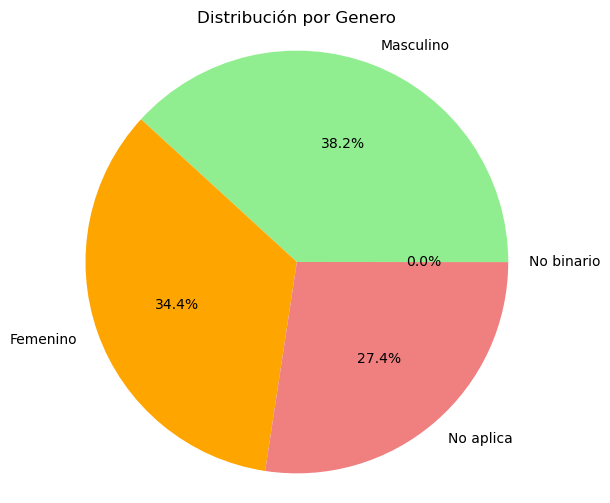

In [7]:
conteo_categorias = df['Sexo'].value_counts()
plt.figure(figsize=(6, 6))  # Tamaño de la figura (opcional)
colores = ['lightgreen', 'orange', 'lightcoral']
explode = (0.1, 0,0)
plt.pie(conteo_categorias, labels=conteo_categorias.index, colors=colores, autopct='%1.1f%%')
plt.title('Distribución por Genero')
# Mostrar el diagrama de torta
plt.axis('equal') 

In [8]:
df.dropna(subset=["Nombre_Entidad"], axis=0, inplace=True)
df.dropna(subset=["Producto_de_Credito"], axis=0, inplace=True)
df['Tipo_Entidad'] = df['Tipo_Entidad'].astype('object')
df['Codigo_Entidad'] = df['Codigo_Entidad'].astype('object')
df['Unicap'] = df['Unicap'].astype('object')
df['Renglon'] = df['Renglon'].astype('object')
##df['Montos_Desembolsados'] = df['Montos_Desembolsados'] / 1000000
##df['Montos_Desembolsados'] = df['Montos_Desembolsados'].apply(lambda x: '{:,.2f}'.format(x))

La variable Tipo_de_Credito que es categórica presenta cuatro diferentes atributos para el tipo de crédito comercial; Ordinario, Tesorería, Preferencial o Corporativo y Especial. Para el análisis se agrupa en una sola categória "Comercial". en esta columna queda establecido como Tipo de Crédito, Comercial, Consumo y Vivienda.

In [9]:
mapeo = {
    'Comercial ordinario': 'Comercial',
    'Comercial tesorería': 'Comercial',
    'Comercial preferencial o corporativo': 'Comercial',
    'Comercial especial': 'Comercial'}

# se Utiliza el método replace para hacer el reemplazo
df['Tipo_de_Credito'] = df['Tipo_de_Credito'].replace(mapeo)
df.head(5)

,Tipo_Entidad,Nombre_Tipo_Entidad,Codigo_Entidad,Nombre_Entidad,Fecha_Corte,Unicap,Descrip_Unicap,Renglon,Tipo_de_Persona,Sexo,Tamaño_de_Empresa,Tipo_de_Credito,Tipo_de_Garantia,Producto_de_Credito,Plazo_de_Credito,TProm_Pond,Montos_Desembolsados,Numero_de_Creditos_Desembolsados
0,1,BC-ESTABLECIMIENTO BANCARIO,58,Coopcentral,30/09/2022,1,TASAS DE INTERESES ACTIVAS,33,Natural,Masculino,No aplica,Consumo,Sin Garantia,Tarjeta de crédito para ingresos superiores a ...,Avances en efectivo,23.36,1.542100e+08,275.0
1,1,BC-ESTABLECIMIENTO BANCARIO,6,Itau,03/03/2023,1,TASAS DE INTERESES ACTIVAS,52,Natural,Masculino,No aplica,Consumo,Sin Garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos a más de 36 meses,23.93,5.368069e+08,45.0
2,1,BC-ESTABLECIMIENTO BANCARIO,54,Bancoomeva,08/07/2022,1,TASAS DE INTERESES ACTIVAS,22,Natural,Femenino,No aplica,Consumo,Sin Garantia,Libre inversión,Más de 1 año y hasta 3 años,20.13,1.620960e+07,2.0
3,1,BC-ESTABLECIMIENTO BANCARIO,13,BBVA Colombia,09/09/2022,1,TASAS DE INTERESES ACTIVAS,40,Juridica,No aplica,Mediana empresa,Comercial,Garantía idónea o no idónea,Empresarial,Hasta 30 días,13.43,1.400000e+09,1.0
4,1,BC-ESTABLECIMIENTO BANCARIO,7,Bancolombia,04/11/2022,1,TASAS DE INTERESES ACTIVAS,190,Juridica,No aplica,Gran empresa,Comercial,Garantía idónea o no idónea,Empresarial,Más de 30 días y hasta 1 año,17.79,1.781323e+10,135.0


In [10]:
df.isnull().sum()

Tipo_Entidad                        0
Nombre_Tipo_Entidad                 0
Codigo_Entidad                      0
Nombre_Entidad                      0
Fecha_Corte                         0
Unicap                              0
Descrip_Unicap                      0
Renglon                             0
Tipo_de_Persona                     0
Sexo                                0
Tamaño_de_Empresa                   0
Tipo_de_Credito                     0
Tipo_de_Garantia                    0
Producto_de_Credito                 0
Plazo_de_Credito                    0
TProm_Pond                          0
Montos_Desembolsados                0
Numero_de_Creditos_Desembolsados    0
dtype: int64

Después de la eliminación de los na en "Nombre_Entidad" se corrije los na en las columnas Tipo_de_Persona,Sexo,Tamaño_de_Empresa,Tipo_de_Credito,Tipo_de_Garantia,Producto_de_Credito,Plazo_de_Credito,TProm_Pond. No obstante persisten 222,451 na en "Tasa_UVR" estos registros requieren un trato diferente dado que esta tasa solo aplica para los productos de vivienda, por ello es una columna aparte. Dado lo anterior se decidió eliminar la columna.

## 2.3 Análisis de variables enteras

Además de las variables categóricas, también podemos encontrar variables numéricas discretas que se encuentran tipeados float, estas categorias son Montos_Desembolsados, Numero_de_Creditos_Desembolsados y Plazo esta variable está como categórica y se transforma a entera.

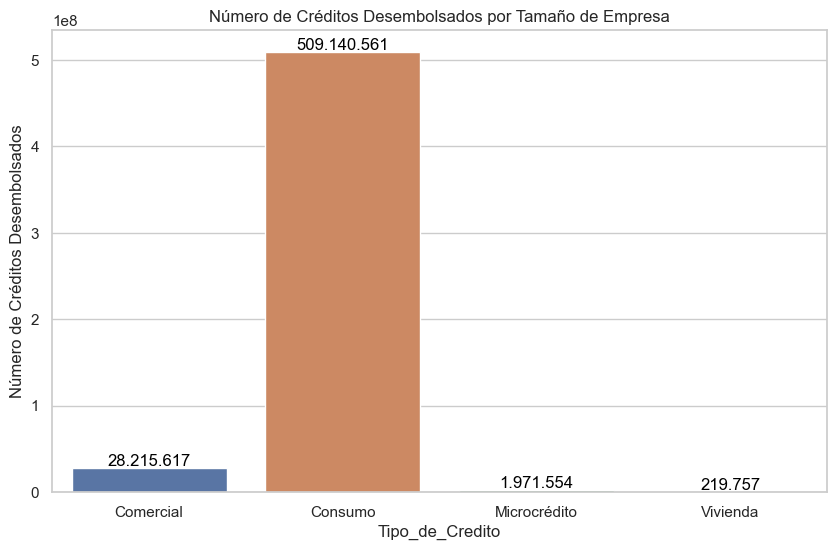

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import locale

# Establecer el estilo de fondo
sns.set(style="whitegrid")

# Configurar el formato de números con separador de miles
locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')  # Cambiar 'es_ES.UTF-8' según tu configuración de idioma

# Calcular la suma de número de créditos desembolsados por tamaño de empresa
suma_creditos_por_tamaño = df.groupby('Tipo_de_Credito')['Numero_de_Creditos_Desembolsados'].sum()
suma_creditos_por_tamaño = suma_creditos_por_tamaño.reset_index()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño de la figura
ax = sns.barplot(x="Tipo_de_Credito", y="Numero_de_Creditos_Desembolsados", data=suma_creditos_por_tamaño, errcolor=None, errorbar=None)

# Agregar etiquetas a las barras con separador de miles
for p in ax.patches:
    height = p.get_height() 
    ax.annotate(f'{locale.format_string("%.0f", height, grouping=True)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Personalizar etiquetas y título
plt.xlabel('Tipo_de_Credito')
plt.ylabel('Número de Créditos Desembolsados')
plt.title('Número de Créditos Desembolsados por Tipo de Crédito')

# Mostrar el gráfico de barras
plt.show()

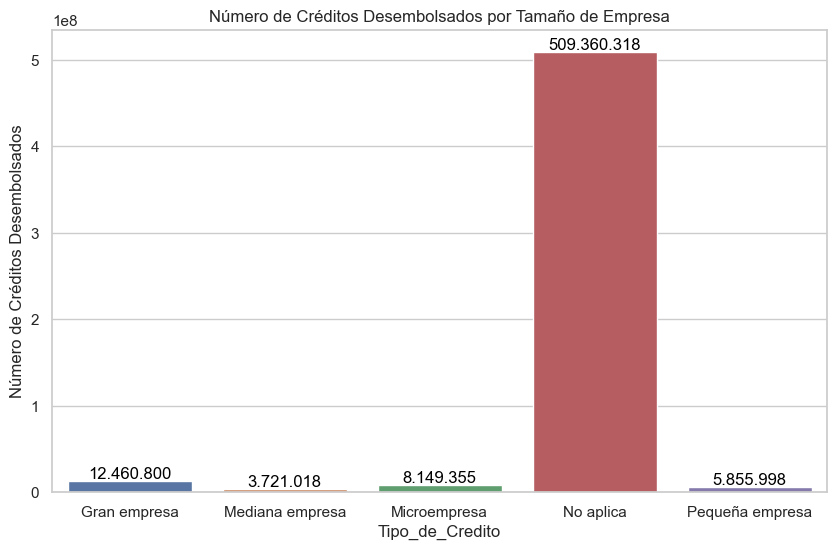

In [27]:
# Establecer el estilo de fondo
sns.set(style="whitegrid")

# Configurar el formato de números con separador de miles
locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')  # Cambiar 'es_ES.UTF-8' según tu configuración de idioma
suma_creditos_por_tamaño = df.groupby('Tamaño_de_Empresa')['Numero_de_Creditos_Desembolsados'].sum()
suma_creditos_por_tamaño = suma_creditos_por_tamaño.reset_index()
plt.figure(figsize=(10, 6))  # Tamaño de la figura
ax = sns.barplot(x="Tamaño_de_Empresa", y="Numero_de_Creditos_Desembolsados", data=suma_creditos_por_tamaño, errcolor=None, errorbar=None)

# Agregar etiquetas a las barras con separador de miles
for p in ax.patches:
    height = p.get_height() 
    ax.annotate(f'{locale.format_string("%.0f", height, grouping=True)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Personalizar etiquetas y título
plt.xlabel('Tipo_de_Credito')
plt.ylabel('Número de Créditos Desembolsados')
plt.title('Número de Créditos Desembolsados por Tamaño de Empresa')

# Mostrar el gráfico de barras
plt.show()

In [28]:
Numero_total_desembolsado = df['Numero_de_Creditos_Desembolsados'].sum()
Numero_total_desembolsado_con_separador = '{:,}'.format(Numero_total_desembolsado)
print(Numero_total_desembolsado_con_separador)

539,547,489.0


En total se desembolsaron, en el período 539,547,489 nuevos créditos, donde el 94% pertenece a tipo de crédito consumo, el 5.22% de los créditos desembolsados son bajo linea comercial.

In [13]:
unique_values = df['Plazo_de_Credito'].unique()
print(unique_values)

['Avances en efectivo' 'Consumos a más de 36 meses'
 'Más de 1 año y hasta 3 años' 'Hasta 30 días'
 'Más de 30 días y hasta 1 año' 'Entre 31 días y 1 año'
 'Consumos entre 25 y 36 meses' 'Vivienda a 5 años'
 'Consumos entre 19 y 24  meses' 'Consumos entre  13 y 18 meses'
 'Más de 3 años y hasta 5 años' 'Más de 5 años y hasta 7 años'
 'Hasta 1 año' 'A más de 7 años' 'Consumos entre 7 y 12 meses'
 'Consumos a un mes' 'Más de 15 años y hasta 20 años' 'A más de 20 años'
 'Consumos entre 2 y 6 meses' 'Más de 7 años y hasta 15 años'
 'Más de 2 años y hasta 3 años' 'Hasta 6 meses'
 'Más de 6 meses y hasta 1 año' 'Más de 1 año y hasta 2 años'
 'Más de 3 años y hasta 4 años']


A continuación se realiza una agrupación de los plazos bajo los cuales se realizaron los desembolsos pasando de un tipo cadena a entero en número de meses

In [14]:
mapeo = {
    'Avances en efectivo': 12,
    'Consumos a un mes': 1,
    'Hasta 30 días': 1,
    'Hasta 30 días': 1,
    'Consumos entre 2 y 6 meses': 6,
    'Hasta 6 meses': 6,
    'Más de 6 meses y hasta 1 año': 12,
    'Más de 30 días y hasta 1 año': 12,
    'Entre 31 días y 1 año': 12,
    'Hasta 1 año': 12,
    'Consumos entre 7 y 12 meses': 12,
    'Consumos entre  13 y 18 meses': 18,
    'Más de 1 año y hasta 2 años': 24,
    'Consumos entre 19 y 24  meses': 24,
    'Más de 2 años y hasta 3 años': 36,
    'Consumos entre 25 y 36 meses': 36,
    'Más de 1 año y hasta 3 años': 36,
    'Más de 3 años y hasta 4 años': 48,
    'Consumos a más de 36 meses': 60,
    'Más de 3 años y hasta 5 años': 60, 
    'Vivienda a 5 años': '60',
    'Más de 5 años y hasta 7 años': 84,
    'Más de 7 años y hasta 15 años': 180,
    'A más de 7 años': 120,
    'Más de 15 años y hasta 20 años': 240,
    'A más de 20 años': 360,
}

# se Utiliza el método replace para hacer el reemplazo
df['Plazo_de_Credito'] = df['Plazo_de_Credito'].replace(mapeo)
df['Plazo_de_Credito'] = df['Plazo_de_Credito'].astype(int)
df.head(5)

,Tipo_Entidad,Nombre_Tipo_Entidad,Codigo_Entidad,Nombre_Entidad,Fecha_Corte,Unicap,Descrip_Unicap,Renglon,Tipo_de_Persona,Sexo,Tamaño_de_Empresa,Tipo_de_Credito,Tipo_de_Garantia,Producto_de_Credito,Plazo_de_Credito,TProm_Pond,Montos_Desembolsados,Numero_de_Creditos_Desembolsados
0,1,BC-ESTABLECIMIENTO BANCARIO,58,Coopcentral,30/09/2022,1,TASAS DE INTERESES ACTIVAS,33,Natural,Masculino,No aplica,Consumo,Sin Garantia,Tarjeta de crédito para ingresos superiores a ...,12,23.36,1.542100e+08,275.0
1,1,BC-ESTABLECIMIENTO BANCARIO,6,Itau,03/03/2023,1,TASAS DE INTERESES ACTIVAS,52,Natural,Masculino,No aplica,Consumo,Sin Garantia,Tarjeta de crédito para ingresos superiores a ...,60,23.93,5.368069e+08,45.0
2,1,BC-ESTABLECIMIENTO BANCARIO,54,Bancoomeva,08/07/2022,1,TASAS DE INTERESES ACTIVAS,22,Natural,Femenino,No aplica,Consumo,Sin Garantia,Libre inversión,36,20.13,1.620960e+07,2.0
3,1,BC-ESTABLECIMIENTO BANCARIO,13,BBVA Colombia,09/09/2022,1,TASAS DE INTERESES ACTIVAS,40,Juridica,No aplica,Mediana empresa,Comercial,Garantía idónea o no idónea,Empresarial,1,13.43,1.400000e+09,1.0
4,1,BC-ESTABLECIMIENTO BANCARIO,7,Bancolombia,04/11/2022,1,TASAS DE INTERESES ACTIVAS,190,Juridica,No aplica,Gran empresa,Comercial,Garantía idónea o no idónea,Empresarial,12,17.79,1.781323e+10,135.0


In [15]:
df_enteras = df[['Numero_de_Creditos_Desembolsados','Plazo_de_Credito']]
df_enteras.describe()

,Numero_de_Creditos_Desembolsados,Plazo_de_Credito
count,232622.000000,232622.000000
mean,2319.417291,50.444016
std,19143.191758,60.111491
min,1.000000,1.000000
25%,2.000000,12.000000
50%,8.000000,36.000000
75%,97.000000,60.000000
max,622421.000000,360.000000


## 2.4 Análisis de variables continuas

Para "TProm_Pond" presenta valores en "0" lo cual en el contexto del negocio es posible desembolsar nuevas operaciones con tasa cero en los primeros años de un crédito. Sin embargo, "Tasa_UVR" presenta un valor negativo esto no tiene sentido esta variable también tiene nan. Los valores de Montos_Desembolsados están capturados en notación cientifica. 

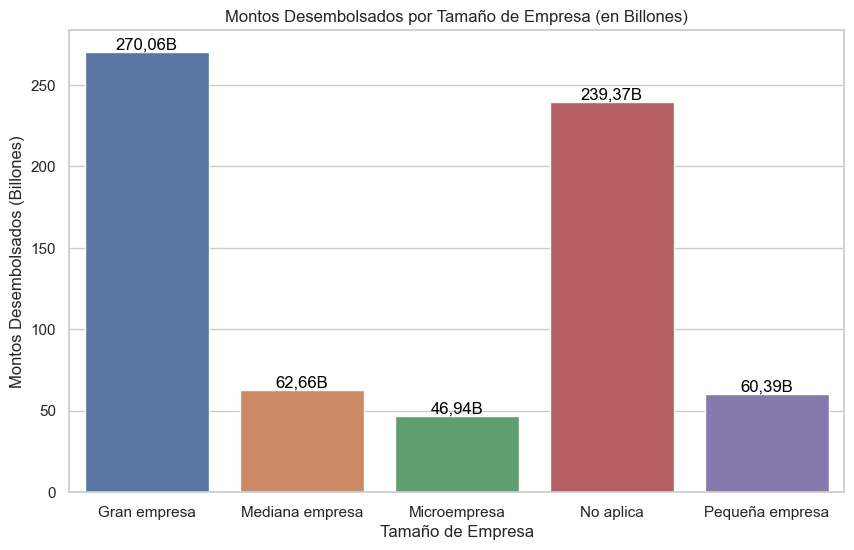

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import locale

# Establecer el estilo de fondo
sns.set(style="whitegrid")

# Configurar el formato de números con separador de miles
locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')  # Cambiar 'es_ES.UTF-8' según tu configuración de idioma

# Calcular la suma de montos desembolsados por tamaño de empresa en billones
suma_montos_por_tamaño = df.groupby('Tamaño_de_Empresa')['Montos_Desembolsados'].sum() / 1e12  # Dividir por un billón (1e12)
suma_montos_por_tamaño = suma_montos_por_tamaño.reset_index()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño de la figura
ax = sns.barplot(x="Tamaño_de_Empresa", y="Montos_Desembolsados", data=suma_montos_por_tamaño, errcolor=None, errorbar=None)

# Agregar etiquetas a las barras con separador de miles y la unidad "B" para billones
for p in ax.patches:
    height = p.get_height() 
    ax.annotate(f'{locale.format_string("%.2f", height, grouping=True)}B', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Personalizar etiquetas y título
plt.xlabel('Tamaño de Empresa')
plt.ylabel('Montos Desembolsados (Billones)')
plt.title('Montos Desembolsados por Tamaño de Empresa (en Billones)')

# Mostrar el gráfico de barras
plt.show()

In [17]:
monto_total_desembolsado = df['Montos_Desembolsados'].sum()
monto_total_desembolsado_con_separador = '{:,.0f}'.format(monto_total_desembolsado)
print(monto_total_desembolsado_con_separador)

679,417,628,324,692


El Sector financiero otorgó crédito por $ 679 Billones de Pesos en el período de análisis, en donde la Gran Empresa (Corporativo) representa el 39.0% del total y no aplica o créditos a personas naturales el 35%,  los créditos a Mediana Empresa se ubicaron en un total desembolsado de $62.6 Billones de pesos siendo la tercera linea de mayor participación en los con 9.22%

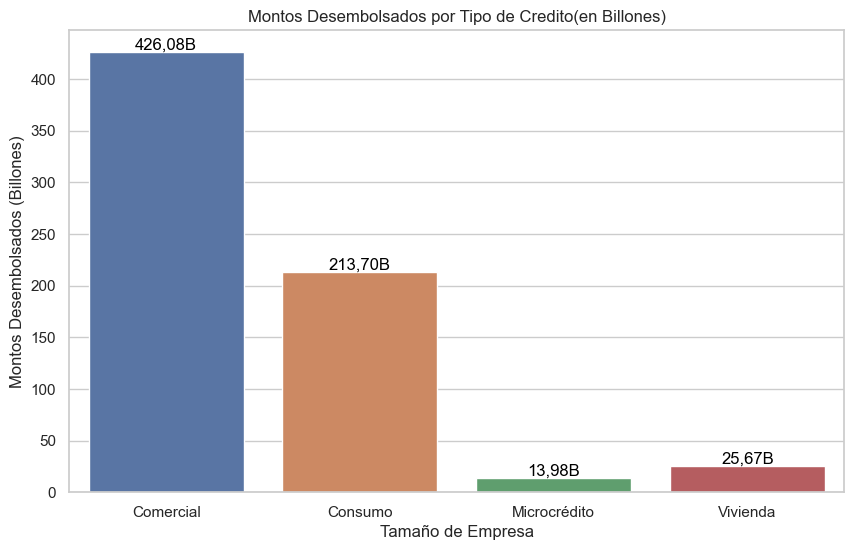

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import locale

# Establecer el estilo de fondo
sns.set(style="whitegrid")

# Configurar el formato de números con separador de miles
locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')  # Cambiar 'es_ES.UTF-8' según tu configuración de idioma

# Calcular la suma de montos desembolsados por tamaño de empresa en billones
suma_montos_por_tamaño = df.groupby('Tipo_de_Credito')['Montos_Desembolsados'].sum() / 1e12  # Dividir por un billón (1e12)
suma_montos_por_tamaño = suma_montos_por_tamaño.reset_index()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño de la figura
ax = sns.barplot(x="Tipo_de_Credito", y="Montos_Desembolsados", data=suma_montos_por_tamaño, errcolor=None, errorbar=None)

# Agregar etiquetas a las barras con separador de miles y la unidad "B" para billones
for p in ax.patches:
    height = p.get_height() 
    ax.annotate(f'{locale.format_string("%.2f", height, grouping=True)}B', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Personalizar etiquetas y título
plt.xlabel('Tamaño de Empresa')
plt.ylabel('Montos Desembolsados (Billones)')
plt.title('Montos Desembolsados por Tipo de Credito(en Billones)')

# Mostrar el gráfico de barras
plt.show()

En el mismo análisis pero por tipo de crédito se evidencia, que Comercial representa el 62% del total de las nuevas colocaciones y Consumo el 31%

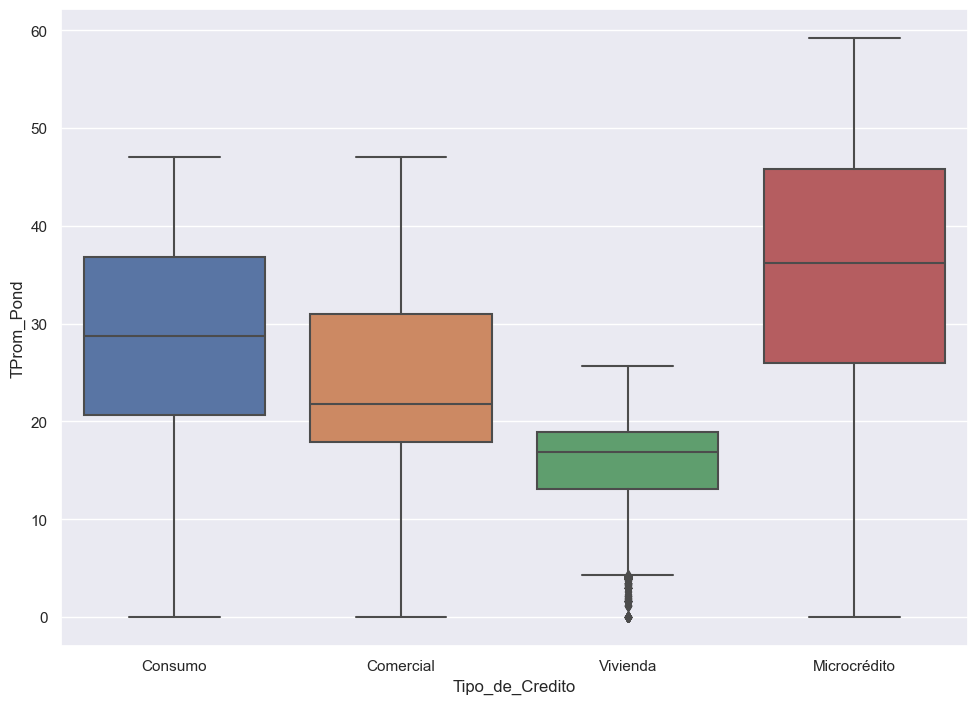

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="Tipo_de_Credito", y="TProm_Pond", data=df) 

Ahora bien, la tasa de interes para los créditos de vivienda es menor comparativamente frente a los demas tipos de crédito. Por su parte, MicroCrédito tiene tasas de interés más altas en comparación con la linea comercial o consumo, esto se debe a que el perfil de riesgo para este segmento son informales sin garantías como respaldo de la obligación por ello las tasas de interes tienden a ser más altas. Para los créditos de consumo sucede algo y es que normalmente no hay una garantía de por medio

[Text(0, 0, 'Coopcentral'),
 Text(1, 0, 'Itau'),
 Text(2, 0, 'Bancoomeva'),
 Text(3, 0, 'BBVA Colombia'),
 Text(4, 0, 'Bancolombia'),
 Text(5, 0, 'Banagrario'),
 Text(6, 0, 'Banco Falabella S.A.'),
 Text(7, 0, 'Banco Davivienda'),
 Text(8, 0, 'Banco GNB Sudameris'),
 Text(9, 0, 'Banco de Occidente'),
 Text(10, 0, 'Banco Pichincha S.A.'),
 Text(11, 0, 'Banco de Bogotá'),
 Text(12, 0, 'Banco Mundo Mujer S.A.'),
 Text(13, 0, 'AV Villas'),
 Text(14, 0, 'Banco Caja Social S.A.'),
 Text(15, 0, 'Mibanco S.A.'),
 Text(16, 0, 'Banco Popular'),
 Text(17, 0, 'Banco Santander'),
 Text(18, 0, 'Scotiabank Colpatria S.A.'),
 Text(19, 0, 'Finandina'),
 Text(20, 0, 'Banco W S.A.'),
 Text(21, 0, 'Bancamia S.A.'),
 Text(22, 0, 'Banco Serfinanza S.A.'),
 Text(23, 0, 'Lulo Bank'),
 Text(24, 0, 'Credifinanciera S.A.'),
 Text(25, 0, 'Citibank'),
 Text(26, 0, 'Banco J.P: Morgan Colombia S.A.'),
 Text(27, 0, 'Banco BTG Pactual Colombia'),
 Text(28, 0, 'RCI Colombia S.A.'),
 Text(29, 0, 'Tuya'),
 Text(30, 0, 'C

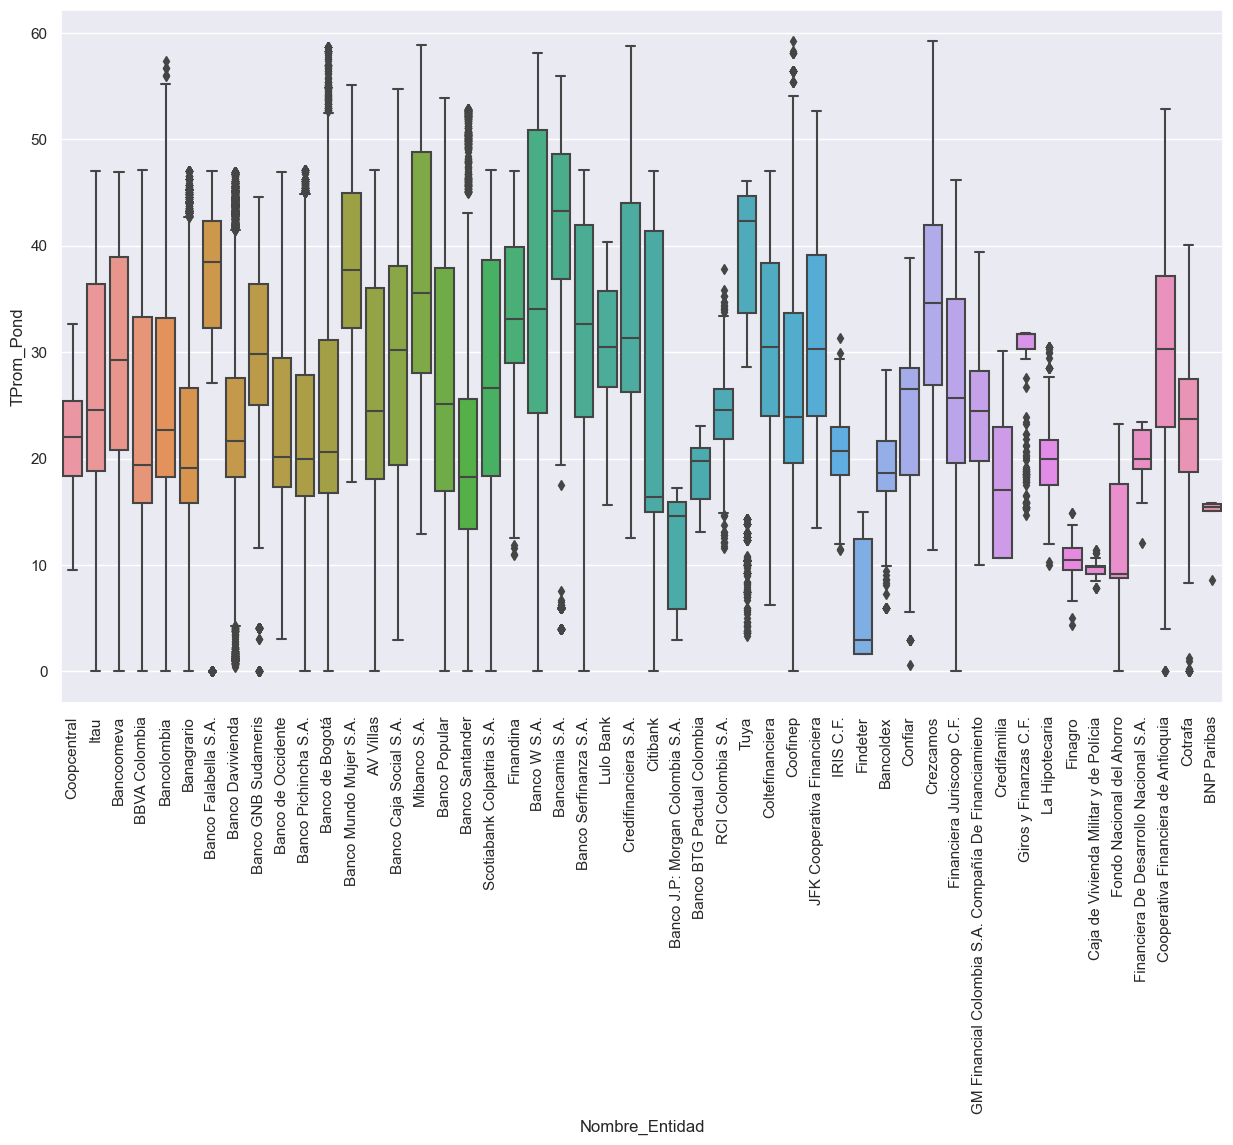

In [20]:
sns.set(rc={'figure.figsize':(15,9)})
ax = sns.boxplot(x="Nombre_Entidad", y="TProm_Pond", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

En esta vista, se tiene la tasa de interes promedio por entidad financiera, se destaca a las compañías, Tuya, Bancamia y Falabella con las tasas más altas del mercado. Por otro lado, las entidades con las menores tasas en el mercado son credifamilia, Banco Santander, y CityBank

# Tasa de Interes entre Enero 2022 y Agosto 2023

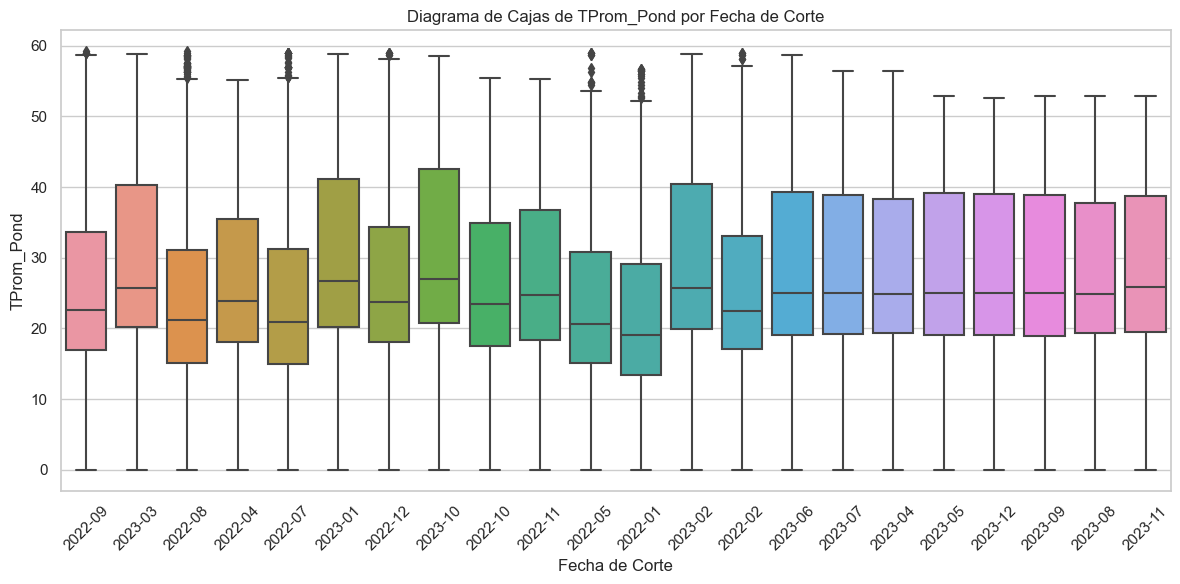

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la columna "Fecha_Corte" en datetime
df['Fecha_Corte'] = pd.to_datetime(df['Fecha_Corte'])

# Luego, puedes convertirla en una variable categórica con el formato deseado
df['Fecha_Corte'] = df['Fecha_Corte'].dt.strftime('%Y-%m')

# Resto del código para crear el diagrama de cajas (boxplot) igual que antes
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x="Fecha_Corte", y="TProm_Pond", data=df)
plt.xlabel('Fecha de Corte')
plt.ylabel('TProm_Pond')
plt.title('Diagrama de Cajas de TProm_Pond por Fecha de Corte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El comportamiento de las tasas de interés en el sector financiero de Colombia durante el año 2022 estuvo marcado por la volatilidad económica. Factores como el índice de precios al consumidor (IPC) y la fluctuación del dólar ejercieron presión al alza sobre la tasa de referencia bancaria. Sin embargo, el año 2023 ha presenciado un giro hacia una política monetaria contractiva, que ha contribuido a estabilizar el comportamiento de las tasas de interés en el país. Este cambio refleja la respuesta de las autoridades financieras para mantener el equilibrio en el mercado y fomentar un ambiente más predecible y estable para los participantes del sector financiero.

In [22]:
df_comercial = df[df['Tipo_de_Credito'] == 'Comercial']
resumen_comercial = df_comercial[['TProm_Pond', 'Montos_Desembolsados', 'Numero_de_Creditos_Desembolsados']].describe()
resumen_comercial.head(10)

,TProm_Pond,Montos_Desembolsados,Numero_de_Creditos_Desembolsados
count,93854.000000,9.385400e+04,93854.000000
mean,24.549573,4.539766e+09,300.633079
std,10.118222,2.506934e+10,2393.646504
min,0.000000,6.000000e-02,1.000000
25%,17.950000,6.000000e+07,1.000000
50%,21.770000,3.236865e+08,4.000000
75%,30.960000,1.502935e+09,21.000000
max,47.090000,1.028640e+12,93371.000000


In [23]:
df_consumo = df[df['Tipo_de_Credito'] == 'Consumo']
resumen_consumo = df_consumo[['TProm_Pond', 'Montos_Desembolsados', 'Numero_de_Creditos_Desembolsados']].describe()
resumen_consumo.head(10)

,TProm_Pond,Montos_Desembolsados,Numero_de_Creditos_Desembolsados
count,100119.000000,1.001190e+05,100119.000000
mean,28.435623,2.134453e+09,5085.354039
std,10.776540,6.644724e+09,28855.295756
min,0.000000,9.600000e-01,1.000000
25%,20.700000,2.600000e+07,4.000000
50%,28.780000,1.540010e+08,48.000000
75%,36.870000,1.127073e+09,574.000000
max,47.090000,1.490420e+11,622421.000000


In [24]:
df_vivienda = df[df['Tipo_de_Credito'] == 'Vivienda']
resumen_vivienda = df_vivienda[['TProm_Pond', 'Montos_Desembolsados', 'Numero_de_Creditos_Desembolsados']].describe()
resumen_vivienda.head(10)

,TProm_Pond,Montos_Desembolsados,Numero_de_Creditos_Desembolsados
count,18120.000000,1.812000e+04,18120.000000
mean,15.712270,1.416504e+09,12.127870
std,4.792761,3.177085e+09,29.996051
min,0.000000,1.000000e+05,1.000000
25%,13.070000,1.154572e+08,1.000000
50%,16.920000,3.153864e+08,3.000000
75%,18.930000,1.187513e+09,9.000000
max,25.720000,6.383443e+10,1022.000000


## Gráfico de Correlación

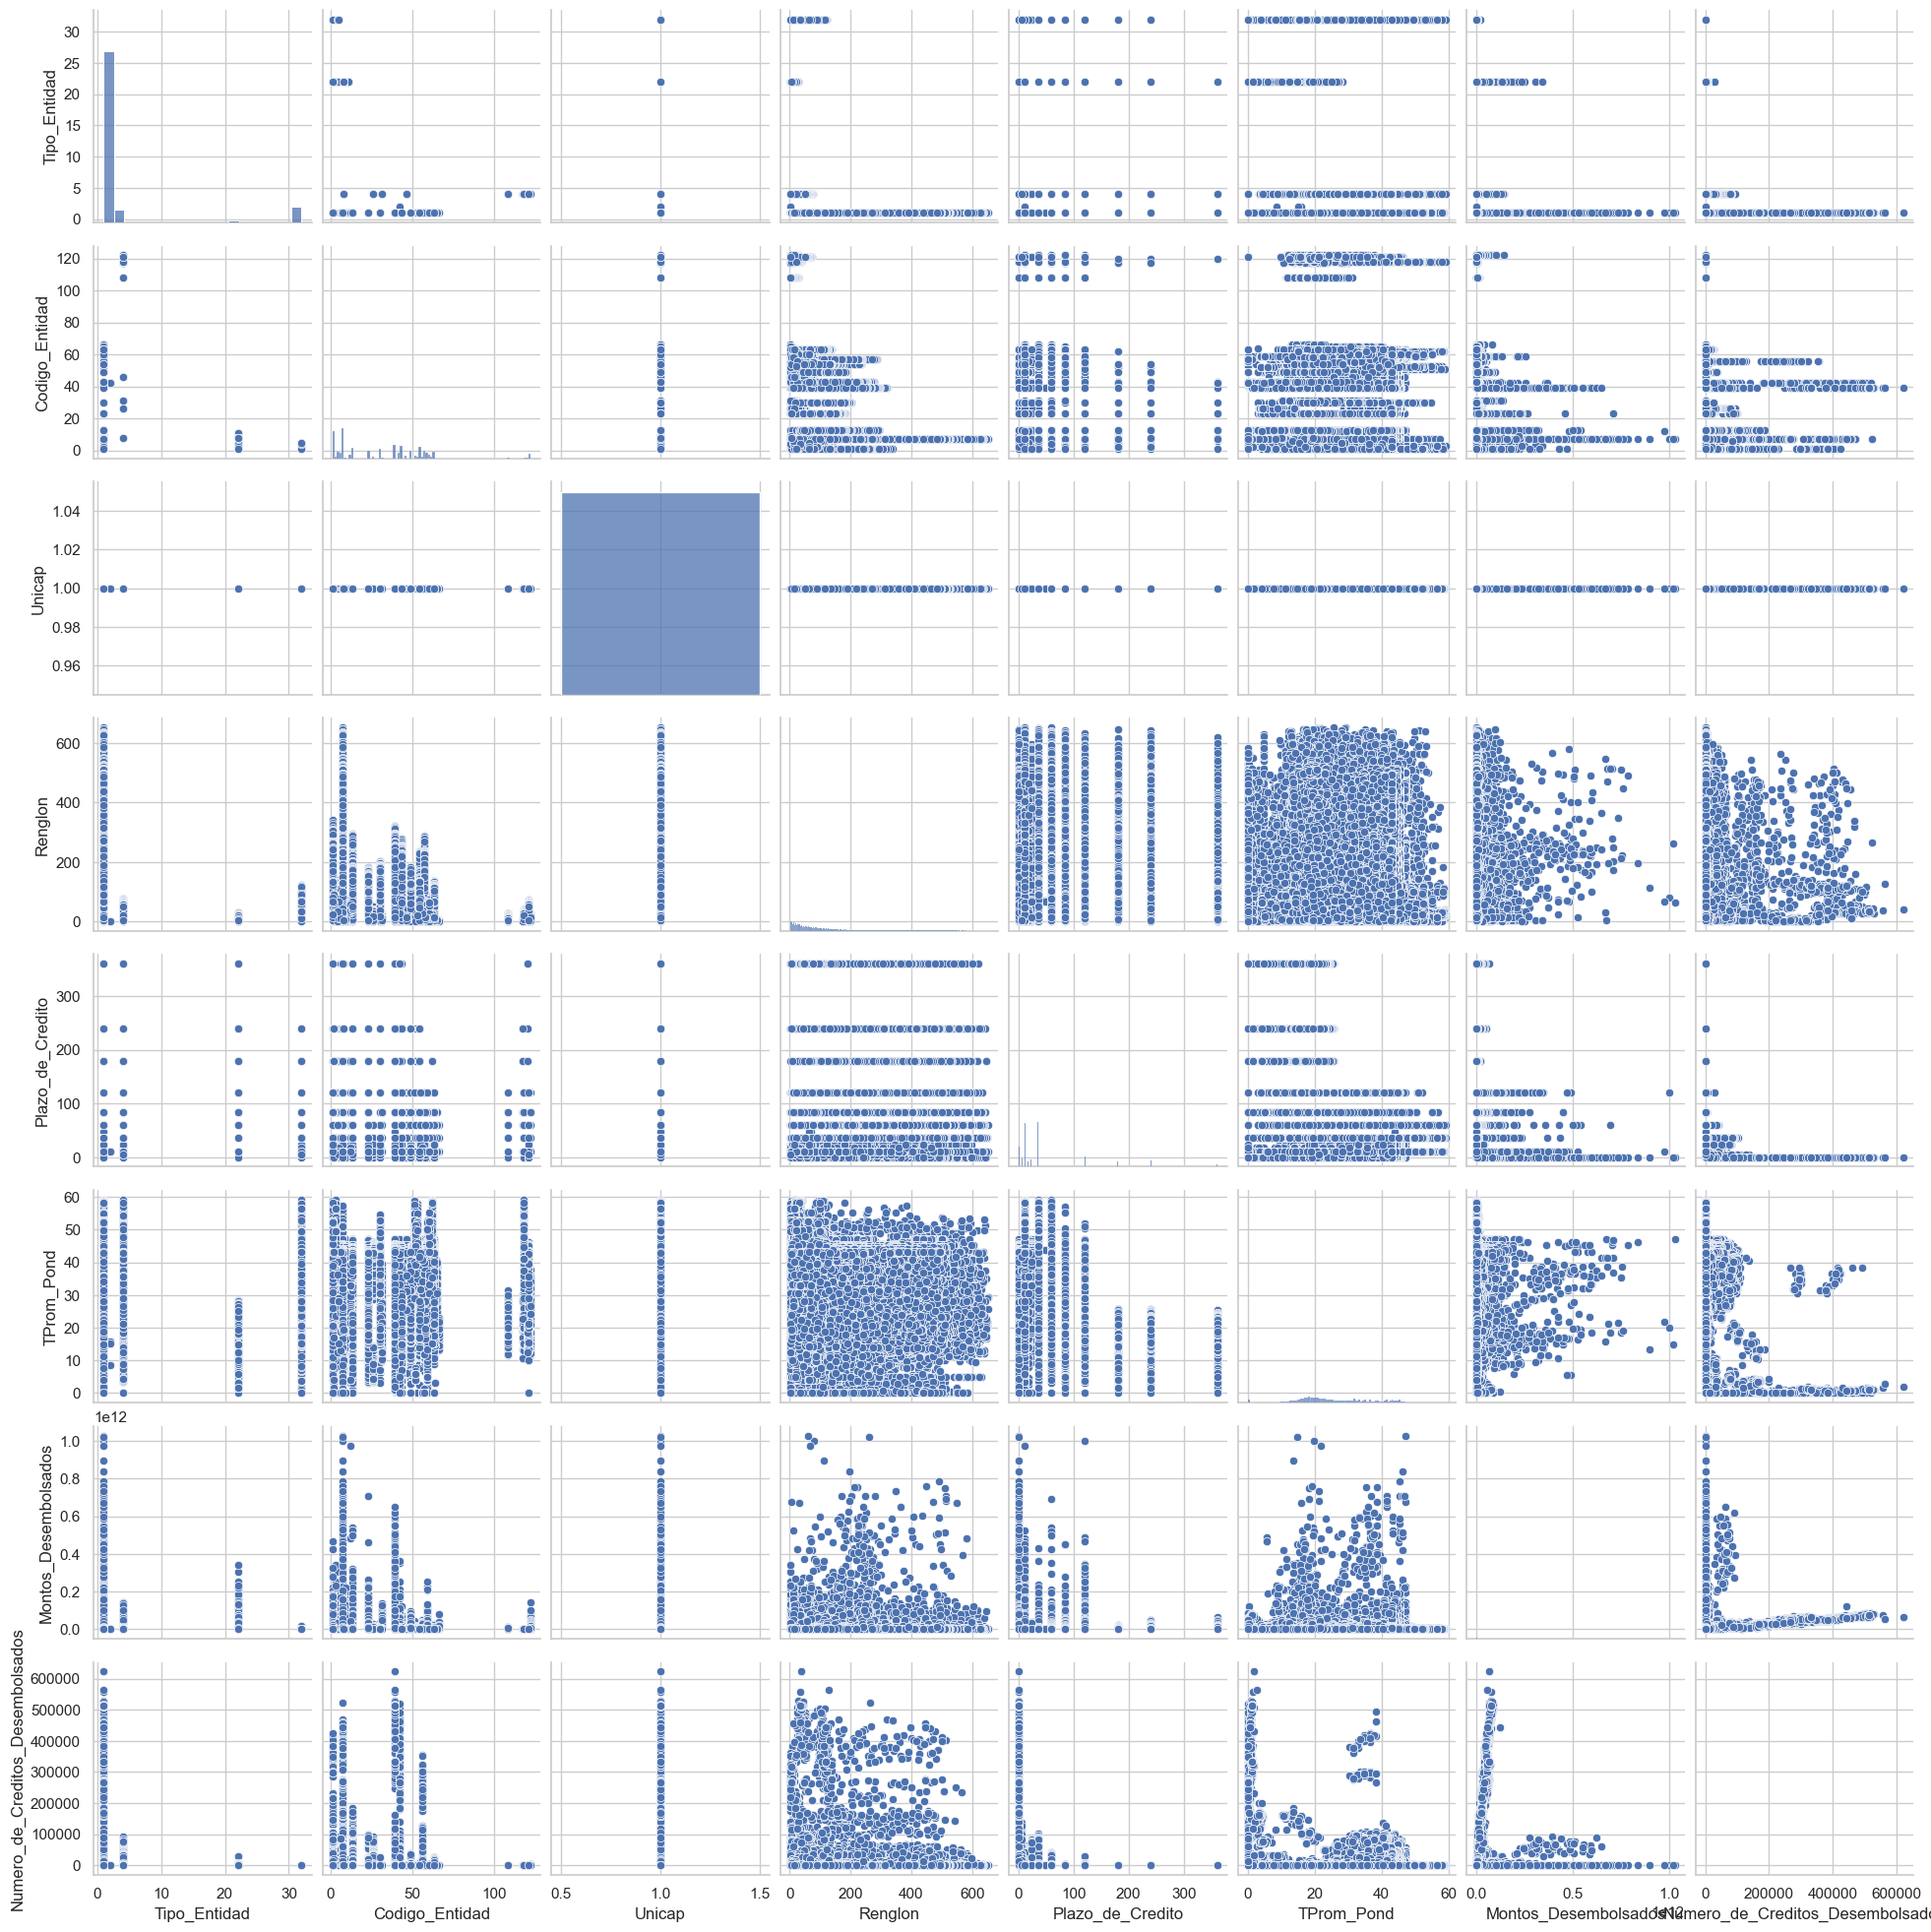

In [25]:
sns.pairplot(df)

No se evidencia correlacion fuerte entre las variables